In [1]:
from IPython.display import Latex

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

pp = PdfPages('multipage.pdf')

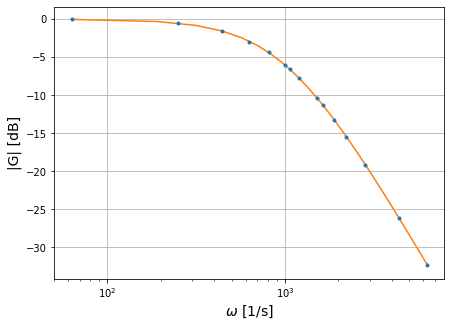

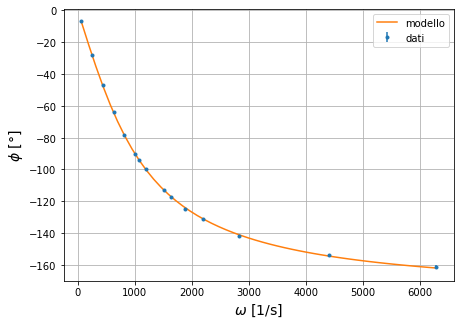

In [2]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/dati_sallen_key.csv')
df['G'] = 20*np.log10(df.V_out/5*np.sqrt(8))
df['dG'] = 20/np.log(10)/df.V_out*df.dV_out

tau = 1e-3
x = np.linspace(2*np.pi*min(df.f), 2*np.pi*max(df.f))
f = lambda omega: 1 / (-1j*omega*tau+1)**2

plt.errorbar(2*np.pi*df.f, df.G, yerr=df.dG, fmt='.', label='dati')
plt.plot(x, 20*np.log10(np.abs(f(x))), label='modello')
plt.xscale('log')
plt.xlabel('$\omega$ [1/s]', fontsize=14)
plt.ylabel('|G| [dB]', fontsize=14)
plt.grid()
pp.savefig()
plt.show()

plt.errorbar(2*np.pi*df.f, df.phi, yerr=df.dphi, fmt='.', label='dati')
plt.plot(x, -np.angle(f(x))/np.pi*180, label='modello')
plt.xlabel('$\omega$ [1/s]', fontsize=14)
plt.ylabel('$\phi$ [°]', fontsize=14)
plt.grid()
plt.legend()
pp.savefig()
plt.show()

In [3]:
pp.close()